[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1mGfwiN4bkWtV_LrwEpv28Avp0tie-byO?usp=sharing)

## Loading dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pylab as plt
import random

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

## An overview of the images

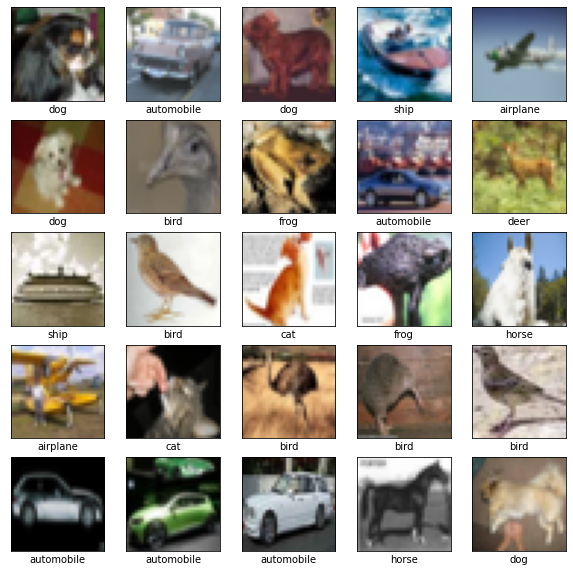

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

train_idx = list(range(len(train_labels)))

random.seed(1)
random_sample = random.sample(train_idx, 25)

plt.figure(figsize=(10,10))
for i in range(len(random_sample)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[random_sample[i]], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[random_sample[i]][0]])
plt.show()

## Color channels

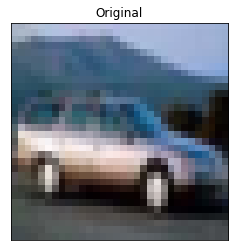

In [ ]:
image_id = 4
plt.figure()
plt.imshow(train_images[image_id], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Original')
plt.show()

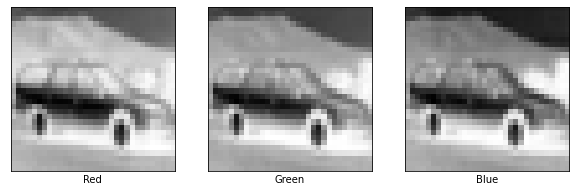

In [ ]:
channel = ['Red', 'Green', 'Blue']
plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[image_id][:,:, i], cmap=plt.cm.binary)
    plt.xlabel(channel[i])
plt.show()


##Build, compile and train the model

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
validation_dataset = tf.data.Dataset.from_tensor_slices((test_images[:5000], test_labels[:5000]))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images[5000:], test_labels[5000:]))

TRAIN_DATASET_SIZE = len(train_dataset)
VALIDATION_DATASET_SIZE = len(validation_dataset)
TEST_DATASET_SIZE = len(test_dataset)

BATCH_SIZE = 128

train_dataset = train_dataset.shuffle(TRAIN_DATASET_SIZE).batch(BATCH_SIZE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

#build
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),                           
  tf.keras.layers.Dense(128, activation='relu'), 
  tf.keras.layers.Dense(64, activation='relu'),                              
  tf.keras.layers.Dense(10),                             
  ])
#compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#train
model.fit(
    train_dataset,
    epochs=10, 
    validation_data=validation_dataset)

_, accuracy = model.evaluate(test_dataset)
print(f'The model accuracy is {accuracy * 100:0.1f}%')

Epoch 1/10
391/391 [==============================] - 5s 11ms/step - loss: 1.8949 - accuracy: 0.3152 - val_loss: 1.7715 - val_accuracy: 0.3620
Epoch 2/10
391/391 [==============================] - 4s 11ms/step - loss: 1.7122 - accuracy: 0.3898 - val_loss: 1.7009 - val_accuracy: 0.4006
Epoch 3/10
391/391 [==============================] - 4s 11ms/step - loss: 1.6352 - accuracy: 0.4171 - val_loss: 1.5959 - val_accuracy: 0.4416
Epoch 4/10
391/391 [==============================] - 4s 11ms/step - loss: 1.5877 - accuracy: 0.4371 - val_loss: 1.5906 - val_accuracy: 0.4472
Epoch 5/10
391/391 [==============================] - 4s 11ms/step - loss: 1.5517 - accuracy: 0.4499 - val_loss: 1.5738 - val_accuracy: 0.4428
Epoch 6/10
391/391 [==============================] - 4s 11ms/step - loss: 1.5212 - accuracy: 0.4602 - val_loss: 1.5441 - val_accuracy: 0.4532
Epoch 7/10
391/391 [==============================] - 4s 11ms/step - loss: 1.5009 - accuracy: 0.4667 - val_loss: 1.5130 - val_accuracy: 0.4722

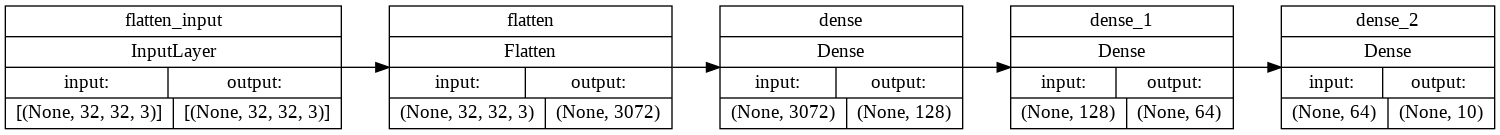

In [ ]:
# CIFAR-10
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

## Make predictions

truck


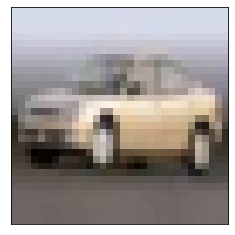

In [ ]:
image_id = 7260 #Pick an image id between 5000 and 9999 inclusive

def get_prediction(image_id):
  img = test_images[image_id]
  img = np.expand_dims(img, 0)
  pred = model.predict(img)
  pred = np.argmax(pred)
  print(class_names[pred])
  plt.figure()
  plt.imshow(test_images[image_id], cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.show()

get_prediction(image_id)

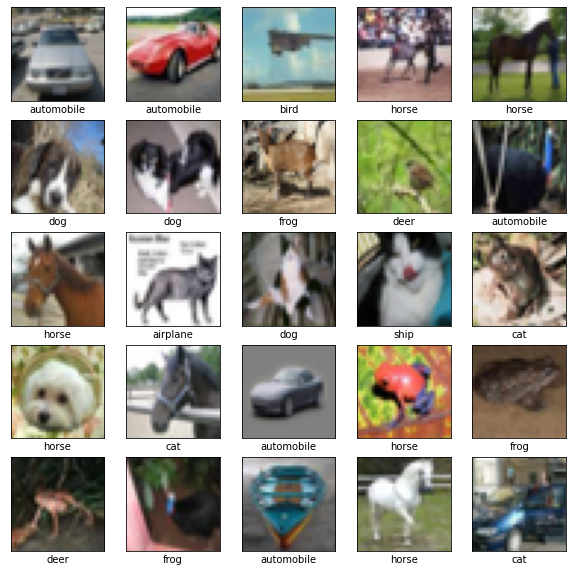

In [ ]:
test_idx = list(range(5000,10000))

random.seed(1)
random_sample = random.sample(test_idx, 25)

def get_pred_id(image_id):
  img = test_images[image_id]
  img = np.expand_dims(img, 0)
  pred = model.predict(img)
  pred = np.argmax(pred)
  return pred

pred_labels = [get_pred_id(i) for i in random_sample]


plt.figure(figsize=(10,10))
for i in range(len(random_sample)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[random_sample[i]], cmap=plt.cm.binary)
    #plt.xlabel(class_names[test_labels[random_sample[i]][0]])
    plt.xlabel(class_names[pred_labels[i]])

plt.show()

